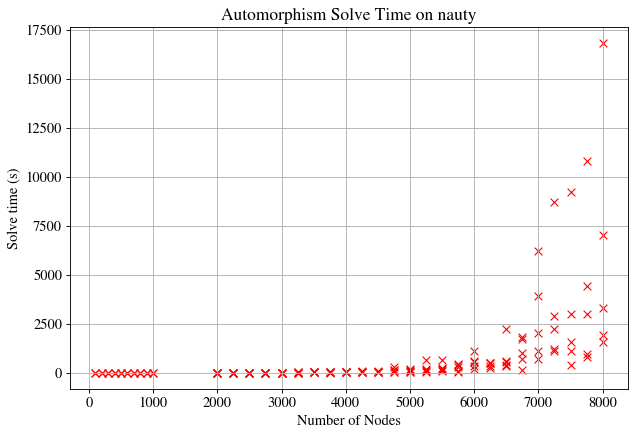

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['lines.markersize'] = 7
matplotlib.rcParams['lines.linewidth'] = 1
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['axes.grid'] = 'true'

labels = []
sizes = []
nauty_times = []
traces_times = []

INF = 3 * 3600

def parse_time(s):
    if s == "INF":
        return INF
    else:
        return float(s)

lines = open("data/nauty_traces_times.txt").readlines()
for line in lines:
    label, nauty, traces = line.split()    
    labels.append(label)
    sizes.append(int(label[-4:]))
    nauty_times.append(parse_time(nauty))
    traces_times.append(parse_time(traces))
    
    
fig0 = plt.figure(num=None, figsize=(9, 6))

plt.scatter(sizes, nauty_times, c="r", marker="x")
plt.title("Automorphism Solve Time on nauty")
plt.ylabel("Solve time (s)")
plt.xlabel("Number of Nodes")
plt.show()

fig0.savefig("exports/nauty_times.pdf", bbox_inches='tight')        

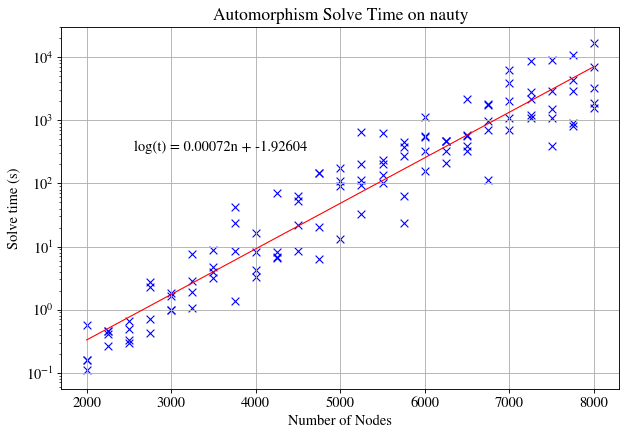

In [19]:
eps = 1e-10

log_nauty_times = np.log10(np.array(nauty_times) + eps)

fig1 = plt.figure(num=None, figsize=(9, 6))
ax = fig1.add_subplot(111)

# find linear best fit to log graph
fit_coeff = np.polyfit(sizes[33:], log_nauty_times[33:], 1)
fit_line = 10 ** (np.array(sizes[33:]) * fit_coeff[0] + fit_coeff[1])
ax.scatter(sizes[33:], nauty_times[33:], c="b", marker="x")

ax.plot([sizes[33], sizes[-1]], [fit_line[0], fit_line[-1]], c='r', linestyle="-")
ax.set_title("Automorphism Solve Time on nauty")
ax.set_yscale("log")
ax.set_ylabel("Solve time (s)")
ax.set_xlabel("Number of Nodes")
ax.text(0.44, 0.65, "log(t) = %.5fn + %.5f" % (fit_coeff[0], fit_coeff[1]),
       verticalalignment='bottom', horizontalalignment='right',
       transform=ax.transAxes, fontsize=13)
plt.show()

fig1.savefig("export/nauty_log_times.pdf", bbox_inches='tight')

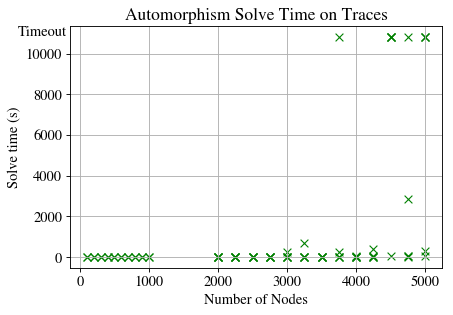

In [20]:
fig2 = plt.figure(num=None, figsize=(6, 4))
ax = fig2.add_subplot(111)
        
ax.scatter(sizes[:-60], traces_times[:-60], c="g", marker="x")
ax.set_title("Automorphism Solve Time on Traces")
ax.set_ylabel("Solve time (s)")
ax.set_xlabel("Number of Nodes")

ax.text(-0.01, 0.95, "Timeout",
       verticalalignment='bottom', horizontalalignment='right',
       transform=ax.transAxes, fontsize=13)

plt.show()

fig2.savefig("export/traces_times.pdf", bbox_inches='tight')
        